# Feature Extraction

Welcome to this tutorial on Feature Extraction, where we'll explore practical Python examples to master this crucial data analysis technique. Ensure you follow the instructions step-by-step for optimal learning. To run the code snippets, simply click on the cell containing the code and press SHIFT+ENTER.

## PCA

PCA is a powerful tool for data analysis and can help to simplify complex datasets, making them easier to understand and work with. It is a technique for feature extraction that identifies a set of orthogonal axes, called principal components, that capture the maximum variance in the data. The principal components are linear combinations of the original variables in the dataset and are ordered in decreasing order of importance. The total variance captured by all the principal components is equal to the total variance in the original dataset.


### Importing Libraries and Configuration


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances
from numpy.linalg import eig

### Settings


In [51]:
# Set the default figure size for matplotlib plots to 15 inches wide by 6 inches tall
rcParams["figure.figsize"] = (15, 6)

# Increase the default font size of the titles in matplotlib plots to extra-extra-large
rcParams["axes.titlesize"] = "xx-large"

# Make the titles of axes in matplotlib plots bold for better visibility
rcParams["axes.titleweight"] = "bold"

# Set the default location of the legend in matplotlib plots to the upper left corner
rcParams["legend.loc"] = "upper left"

# Configure pandas to display all columns of a DataFrame when printed to the console
pd.set_option('display.max_columns', None)

# Configure pandas to display all rows of a DataFrame when printed to the console
pd.set_option('display.max_rows', None)

### Load the dataset and display its first 10 data samples.


In [41]:
iris = datasets.load_iris()

### Step 1: Standardization

First, we need to standardize the dataset to ensure that each variable has a mean of 0 and a standard deviation of 1.

$$
Z = \frac{X-\mu}{\sigma}
$$


In [42]:
# Z-Score Normalization (Standardization)
standard_scaler = StandardScaler()
data_normalized = standard_scaler.fit_transform(iris.data)

### Step2: Covariance Matrix Computation

Calculate the covariance matrix to examine the relationships between features.


In [43]:
cov_matrix = np.cov(data_normalized.T)

### Step 3: Eigen Decomposition

Compute Eigenvalues and Eigenvectors of Covariance Matrix to Identify Principal Components


In [44]:
eigenvalues, eigenvectors = eig(cov_matrix)

### Step 4: Component Selection

Select the top `k` eigenvectors based on their corresponding eigenvalues to capture most of the variance.


In [45]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
k = 2
selected_eigenvectors = sorted_eigenvectors[:, :k]

### Step 5: Data Transformation

Project the original data onto the space spanned by the top `k` eigenvectors to transform the data into a reduced dimensionality.


In [46]:
X_transformed  = np.dot(data_normalized, selected_eigenvectors)

# Create a DataFrame for easier visualization
pca_df = pd.DataFrame(X_transformed , columns=['PC1', 'PC2'])
pca_df['Target'] = iris.target

# Map the target labels to their corresponding species name for better readability
target_species = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
pca_df['Species'] = pca_df['Target'].map(target_species)
display(pca_df.head(n = 10))


,PC1,PC2,Target,Species
0,-2.264703,-0.480027,0,setosa
1,-2.080961,0.674134,0,setosa
2,-2.364229,0.341908,0,setosa
3,-2.299384,0.597395,0,setosa
4,-2.389842,-0.646835,0,setosa
5,-2.075631,-1.489178,0,setosa
6,-2.444029,-0.047644,0,setosa
7,-2.232847,-0.223148,0,setosa
8,-2.334640,1.115328,0,setosa
9,-2.184328,0.469014,0,setosa


## Use sklearn.decomposition PCA

This following sample code demonstrates how to use `sklearn.decomposition.PCA` to implement principal component analysis (PCA) on the Iris dataset.


,PC1,PC2,Target,Species,SK-PC1,SK-PC2
0,-2.264703,-0.480027,0,setosa,-2.264703,0.480027
1,-2.080961,0.674134,0,setosa,-2.080961,-0.674134
2,-2.364229,0.341908,0,setosa,-2.364229,-0.341908
3,-2.299384,0.597395,0,setosa,-2.299384,-0.597395
4,-2.389842,-0.646835,0,setosa,-2.389842,0.646835
5,-2.075631,-1.489178,0,setosa,-2.075631,1.489178
6,-2.444029,-0.047644,0,setosa,-2.444029,0.047644
7,-2.232847,-0.223148,0,setosa,-2.232847,0.223148
8,-2.334640,1.115328,0,setosa,-2.334640,-1.115328
9,-2.184328,0.469014,0,setosa,-2.184328,-0.469014


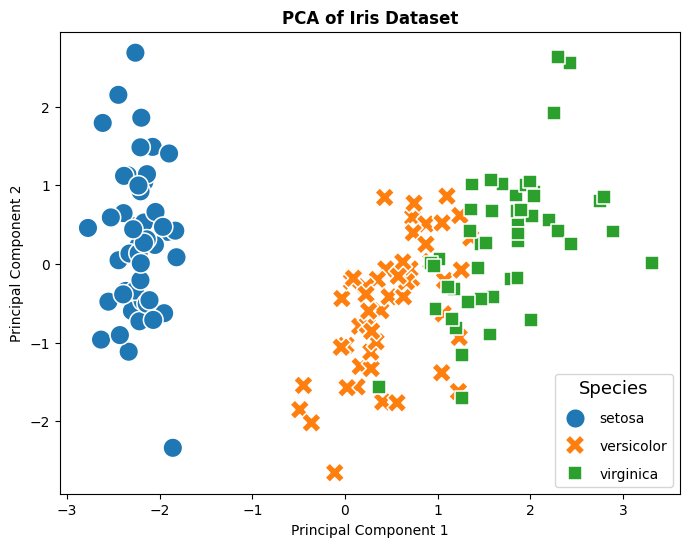

In [47]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_normalized)
pca_df['SK-PC1'] = X_pca[:,0]
pca_df['SK-PC2'] = X_pca[:,1]
display(pca_df.head(n=10))

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='SK-PC1', y='SK-PC2', hue='Species', palette='tab10', style='Species', s=200)

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species', title_fontsize='13', labelspacing=1, loc='lower right')
plt.show()


## Kernel PCA

The following example code shows how to apply kernel PCA, a variation of PCA that uses kernel methods to achieve nonlinear feature extraction. By utilizing a radial basis function (RBF) kernel, kernel PCA can reveal complex nonlinear relationships in the data. This technique is particularly useful for data sets where the linearity assumption does not hold, allowing for more granular class separation in the transformed feature space.


,PC1,PC2,Target,Species,SK-PC1,SK-PC2,SK-KPC1,SK-KPC2
0,-2.264703,-0.480027,0,setosa,-2.264703,0.480027,0.802038,-0.093750
1,-2.080961,0.674134,0,setosa,-2.080961,-0.674134,0.665623,0.109343
2,-2.364229,0.341908,0,setosa,-2.364229,-0.341908,0.758616,0.012529
3,-2.299384,0.597395,0,setosa,-2.299384,-0.597395,0.706189,0.056918
4,-2.389842,-0.646835,0,setosa,-2.389842,0.646835,0.793607,-0.126192
5,-2.075631,-1.489178,0,setosa,-2.075631,1.489178,0.627757,-0.179169
6,-2.444029,-0.047644,0,setosa,-2.444029,0.047644,0.780070,-0.052356
7,-2.232847,-0.223148,0,setosa,-2.232847,0.223148,0.804289,-0.051510
8,-2.334640,1.115328,0,setosa,-2.334640,-1.115328,0.582067,0.096136
9,-2.184328,0.469014,0,setosa,-2.184328,-0.469014,0.718615,0.060771


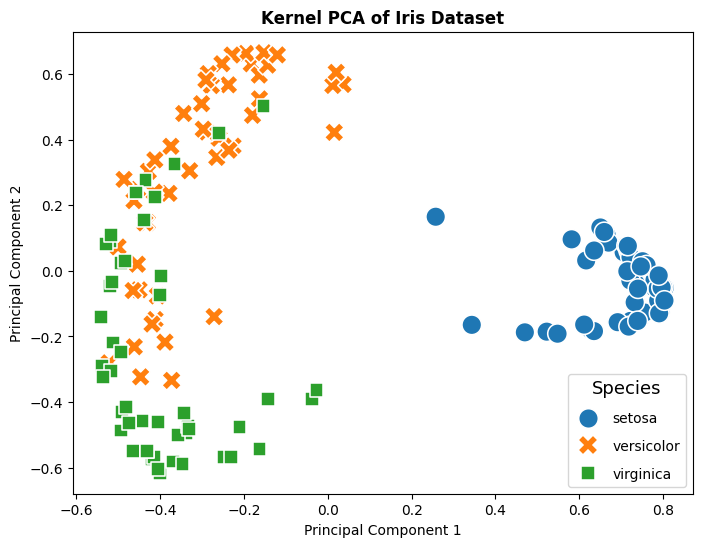

In [48]:
pca = KernelPCA(n_components=2, kernel='rbf')  # Using RBF kernel
X_kpca  = pca.fit_transform(data_normalized)
pca_df['SK-KPC1'] = X_kpca[:,0]
pca_df['SK-KPC2'] = X_kpca[:,1]
display(pca_df.head(n=10))

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='SK-KPC1', y='SK-KPC2', hue='Species', palette='tab10', style='Species', s=200)

plt.title('Kernel PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species', title_fontsize='13', labelspacing=1, loc='lower right')
plt.show()


## t-SNE

The following example code shows how to apply t-Distributed Stochastic Neighbor Embedding (t-SNE), a powerful technique for feature extraction that is particularly well-suited for the visualization of high-dimensional datasets. Unlike PCA and Kernel PCA, t-SNE focuses on preserving the local structure of the data, making it excellent for identifying clusters or groups in the data. By converting affinities of data points to probabilities, t-SNE emphasizes similarities between nearby points and dissimilarities between distant points, resulting in a more intuitive clustering of data points in the transformed space. This method is especially effective for exploring the inherent structure of complex datasets like the Iris dataset, revealing patterns that are not immediately apparent in the original high-dimensional space.


,PC1,PC2,Target,Species,SK-PC1,SK-PC2,SK-KPC1,SK-KPC2,SK-tsnePC1,SK-tsnePC2
0,-2.264703,-0.480027,0,setosa,-2.264703,0.480027,0.802038,-0.093750,-26.283514,-0.934040
1,-2.080961,0.674134,0,setosa,-2.080961,-0.674134,0.665623,0.109343,-22.458551,-1.582246
2,-2.364229,0.341908,0,setosa,-2.364229,-0.341908,0.758616,0.012529,-23.502516,-0.568364
3,-2.299384,0.597395,0,setosa,-2.299384,-0.597395,0.706189,0.056918,-22.724354,-0.502646
4,-2.389842,-0.646835,0,setosa,-2.389842,0.646835,0.793607,-0.126192,-26.786913,-0.364475
5,-2.075631,-1.489178,0,setosa,-2.075631,1.489178,0.627757,-0.179169,-28.650599,-0.741429
6,-2.444029,-0.047644,0,setosa,-2.444029,0.047644,0.780070,-0.052356,-24.550871,0.185788
7,-2.232847,-0.223148,0,setosa,-2.232847,0.223148,0.804289,-0.051510,-25.286180,-0.886462
8,-2.334640,1.115328,0,setosa,-2.334640,-1.115328,0.582067,0.096136,-21.671492,-0.708517
9,-2.184328,0.469014,0,setosa,-2.184328,-0.469014,0.718615,0.060771,-23.178801,-1.504229


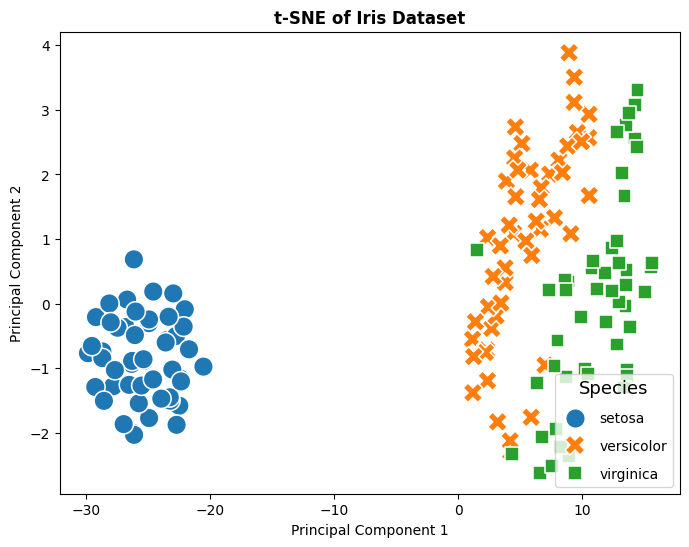

In [49]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(data_normalized)
pca_df['SK-tsnePC1'] = X_tsne[:,0]
pca_df['SK-tsnePC2'] = X_tsne[:,1]
display(pca_df.head(n=10))

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='SK-tsnePC1', y='SK-tsnePC2', hue='Species', palette='tab10', style='Species', s=200)

plt.title('t-SNE of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species', title_fontsize='13', labelspacing=1, loc='lower right')
plt.show()


## Comparing Distance Matrices

A Visual Exploration of PCA, Kernel PCA, and t-SNE


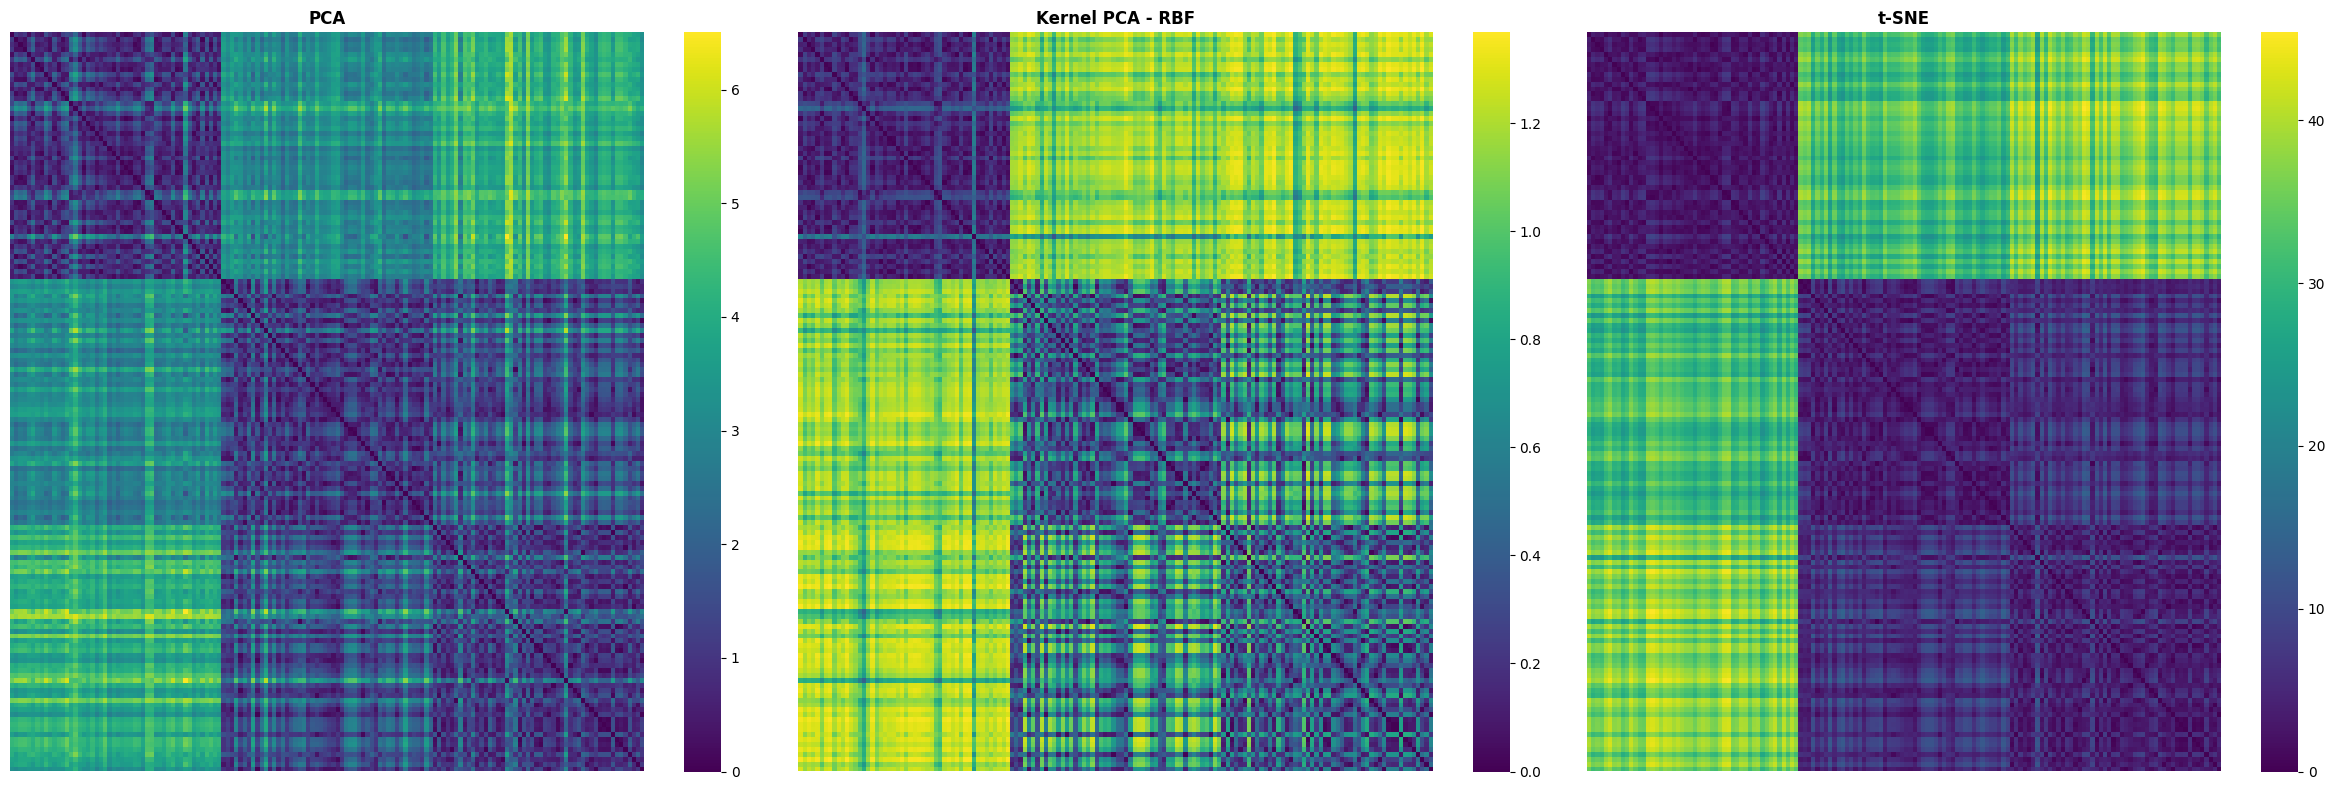

In [50]:
distance_matrix_pca = pairwise_distances(X_pca, metric='euclidean')
distance_matrix_kpca = pairwise_distances(X_kpca, metric='euclidean')
distance_matrix_tsne = pairwise_distances(X_tsne, metric='euclidean')

# Create a figure and a grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(24, 8))  # 1 row, 3 columns

# Plotting the distance matrix for PCA
sns.heatmap(distance_matrix_pca, cmap='viridis', xticklabels=False, yticklabels=False, ax=axs[0])
axs[0].set_title('PCA')

# Plotting the distance matrix for Kernel PCA
sns.heatmap(distance_matrix_kpca, cmap='viridis', xticklabels=False, yticklabels=False, ax=axs[1])
axs[1].set_title('Kernel PCA - RBF')

# Plotting the distance matrix for t-SNE
sns.heatmap(distance_matrix_tsne, cmap='viridis', xticklabels=False, yticklabels=False, ax=axs[2])
axs[2].set_title('t-SNE')

plt.tight_layout()
plt.show()